In [ ]:
%pip install pandas
%pip install seaborn
%pip install matplotlib
%pip install scipy
%pip install scikit-learn
%pip install numpy
%pip install statsmodels

In [2]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import statsmodels.formula.api as smf

pd.set_option('display.max_columns', None)

#### Clean Traffic Data

In [3]:
traffic_data = pd.read_csv('local_authority_traffic.csv')

# Dropping columns that are not needed for analysis
traffic_data.drop(columns=[
    'local_authority_id',
    'local_authority_code',
    'link_length_km',
    'link_length_miles',
    'cars_and_taxis',
], inplace=True)

# London boroughs for filtering
london_boroughs_ulez = [
    "Barking and Dagenham",
    "Barnet",
    "Bexley",
    "Brent",
    "Bromley",
    "Camden",
    "Croydon",
    "Ealing",
    "Enfield",
    "Greenwich",
    "Hackney",
    "Hammersmith and Fulham",
    "Haringey",
    "Harrow",
    "Havering",
    "Hillingdon",
    "Hounslow",
    "Islington",
    "Kensington and Chelsea",
    "Kingston upon Thames",
    "Lambeth",
    "Lewisham",
    "Merton",
    "Newham",
    "Redbridge",
    "Richmond upon Thames",
    "Southwark",
    "Sutton",
    "Tower Hamlets",
    "Waltham Forest",
    "Wandsworth",
    "Westminster",
    "City of London"
]

# Keep only rows where the 'year' column is between 2015 and 2023
traffic_data = traffic_data[(traffic_data['year'] >= 2015) & (traffic_data['year'] <= 2023)]

# Keep only the rows of London boroughs
traffic_data = traffic_data[traffic_data['local_authority_name'].isin(london_boroughs_ulez)]

# Rename columns for better readability
traffic_data = traffic_data.rename(columns={
    'year': 'Year',
    'local_authority_name': 'Borough',
    'road_name': 'Road Name',
    'latitude': 'Latitude',
    'longitude': 'Longitude',
    'minute': 'Minute',
    'all_motor_vehicles': 'Vehicle Count',
})

# traffic_data.to_csv('./Cleaned Data/traffic_combined (5).csv', index=False)
# traffic_data.to_csv('./Cleaned Data/Keeping Estimated Values/camden_traffic_cleaned.csv', index=False)

#### Clean Air Quality Data

In [4]:
# Loading the NO2 datasets
NO2_df1 = pd.read_csv('./Bulk Air Quality Data/BarkingDagenham_Bexley_Brent_NO2.csv')
NO2_df2 = pd.read_csv('./Bulk Air Quality Data/Brent_Bromley_Camden_NO2.csv')
NO2_df3 = pd.read_csv('./Bulk Air Quality Data/Camden_CityOfLondon_NO2.csv')
NO2_df4 = pd.read_csv('./Bulk Air Quality Data/CityOfLondon_Croydon_Ealing_NO2.csv')
NO2_df5 = pd.read_csv('./Bulk Air Quality Data/Ealing_Enfield_NO2.csv')
NO2_df6 = pd.read_csv('./Bulk Air Quality Data/Greenwich_Hackney_NO2.csv')
NO2_df7 = pd.read_csv('./Bulk Air Quality Data/Greenwich_NO2.csv')
NO2_df8 = pd.read_csv('./Bulk Air Quality Data/Hackney_Haringey_Harrow_NO2.csv')
NO2_df9 = pd.read_csv('./Bulk Air Quality Data/Harrow_Havering_Islington_NO2.csv')
NO2_df10 = pd.read_csv('./Bulk Air Quality Data/KensingtonChelsea_KingstonUponThames_Lambeth_NO2.csv')
NO2_df11 = pd.read_csv('./Bulk Air Quality Data/Lambeth_Lewisham_NO2.csv')
NO2_df12 = pd.read_csv('./Bulk Air Quality Data/Lewisham_Merton_Newham_NO2.csv')
NO2_df13 = pd.read_csv('./Bulk Air Quality Data/Newham_Redbridge_NO2.csv')
NO2_df14 = pd.read_csv('./Bulk Air Quality Data/RichmondUponThames_Southwark_NO2.csv')
NO2_df15 = pd.read_csv('./Bulk Air Quality Data/Wandsworth_Westminster_NO2.csv')
NO2_df16 = pd.read_csv('./Bulk Air Quality Data/Westminster_NO2.csv')
NO2_df17 = pd.read_csv('./Bulk Air Quality Data/Westminster_NO2 (2).csv')

# Concatenating all NO2 datasets into one DataFrame
NO2_datasets = pd.concat([NO2_df1, NO2_df2, NO2_df3, NO2_df4, NO2_df5, NO2_df6, NO2_df7, NO2_df8, NO2_df9, NO2_df10, NO2_df11, NO2_df12, NO2_df13, NO2_df14, NO2_df15, NO2_df16, NO2_df17], ignore_index=True)

# Loading the PM2.5 datasets
PM25_df1 = pd.read_csv('./Bulk Air Quality Data/Bexley_Brent_PM2.5.csv')
PM25_df2 = pd.read_csv('./Bulk Air Quality Data/Brent_Bromley_Camden_CityOfLondon_PM2.5.csv')
PM25_df3 = pd.read_csv('./Bulk Air Quality Data/Croydon_Greenwich_PM2.5.csv')
PM25_df4 = pd.read_csv('./Bulk Air Quality Data/Greenwich_Hackney_Havering_PM2.5.csv')
PM25_df5 = pd.read_csv('./Bulk Air Quality Data/Hillingdon_KensingtonAndChelsea_KingstonUponThames_PM2.5.csv')
PM25_df6 = pd.read_csv('./Bulk Air Quality Data/Lambeth_Lewisham_PM2.5.csv')
PM25_df7 = pd.read_csv('./Bulk Air Quality Data/Southwark_PM2.5.csv')
PM25_df8 = pd.read_csv('./Bulk Air Quality Data/Sutton_TowerHamlets_Westminster_PM2.5.csv')

# Concatenating all PM2.5 datasets into one DataFrame
PM25_datasets = pd.concat([PM25_df1, PM25_df2, PM25_df3, PM25_df4, PM25_df5, PM25_df6, PM25_df7, PM25_df8], ignore_index=True)

# Mapping of site codes to boroughs
site_to_borough = {
    "BG1": "Barking and Dagenham",
    "BG2": "Barking and Dagenham",
    "BL0": "Camden",
    "BQ7": "Bexley",
    "BT4": "Brent",
    "BT5": "Brent",
    "BT6": "Brent",
    "BT8": "Brent",
    "BX1": "Bexley",
    "BX2": "Bexley",
    "BY7": "Bromley",
    "CD1": "Camden",
    "CR5": "Croydon",
    "CR7": "Croydon",
    "CR9": "Croydon",
    "CT2": "Croydon",
    "CT3": "Croydon",
    "CT4": "Croydon",
    "CT6": "Croydon",
    "CTA": "Croydon",
    "EA6": "Ealing",
    "EA8": "Ealing",
    "EI1": "Enfield",
    "EI3": "Enfield",
    "EN1": "Enfield",
    "EN4": "Enfield",
    "EN5": "Enfield",
    "EN7": "Enfield",
    "GB6": "Greenwich",
    "GN0": "Greenwich",
    "GN3": "Greenwich",
    "GN4": "Greenwich",
    "GN5": "Greenwich",
    "GN6": "Greenwich",
    "GR4": "Greenwich",
    "GR7": "Greenwich",
    "GR8": "Greenwich",
    "GR9": "Greenwich",
    "GV1": "Greenwich",
    "GV2": "Greenwich",
    "HG1": "Haringey",
    "HG4": "Haringey",
    "HI0": "Hillingdon",
    "HK6": "Hackney",
    "HK9": "Hackney",
    "HN0": "Hounslow",
    "HN1": "Hounslow",
    "HP1": "Hounslow",
    "HR1": "Harrow",
    "HR2": "Harrow",
    "HV1": "Havering",
    "IM1": "Camden",
    "IS2": "Islington",
    "IS6": "Islington",
    "KC1": "Kensington and Chelsea",
    "KT4": "Kingston upon Thames",
    "KT5": "Kingston upon Thames",
    "KT6": "Kingston upon Thames",
    "LB4": "Lambeth",
    "LB5": "Lambeth",
    "LB6": "Lambeth",
    "LH0": "Hillingdon",
    "LW2": "Lewisham",
    "LW4": "Lewisham",
    "LW5": "Lewisham",
    "LW6": "Lewisham",
    "ME2": "Merton",
    "ME9": "Merton",
    "MEA": "Merton",
    "MEB": "Merton",
    "MY1": "Westminster",
    "NB1": "Newham",
    "NM2": "Newham",
    "NM3": "Newham",
    "NM4": "Newham",
    "RB4": "Redbridge",
    "RB7": "Redbridge",
    "RHI": "Richmond upon Thames",
    "RI1": "Richmond upon Thames",
    "RI2": "Richmond upon Thames",
    "SK5": "Southwark",
    "SK6": "Southwark",
    "SKA": "Southwark",
    "TL4": "Tower Hamlets",
    "TL5": "Tower Hamlets",
    "TL6": "Tower Hamlets",
    "WA2": "Waltham Forest",
    "WA7": "Waltham Forest",
    "WA8": "Waltham Forest",
    "WA9": "Waltham Forest",
    "WAB": "Waltham Forest",
    "WM0": "Westminster",
    "WM5": "Westminster",
    "WM6": "Westminster",
    "WMB": "Westminster",
    "WMC": "Westminster",
    "WMD": "Westminster",
    "BQ9": "Bexley",
    "CR8": "Croydon",
    "GB0": "Greenwich",
    "KF1": "Kensington and Chelsea",
    "SK8": "Southwark",
    "SK9": "Southwark",
    "SKB": "Southwark",
    "SKC": "Southwark",
    "ST5": "Southwark",
    "TH4": "Tower Hamlets",
    'HV3': 'Havering',
    'CW3': 'City of Westminster'
}

# Add borough column to processed datasets
PM25_datasets['Borough'] = PM25_datasets['Site'].map(site_to_borough)
NO2_datasets['Borough'] = NO2_datasets['Site'].map(site_to_borough)

# Concatenate the two concentration datasets
air_quality_data = pd.concat([NO2_datasets, PM25_datasets], ignore_index=True)
air_quality_daily = air_quality_data.copy()

# DEBUG: Check if any sites failed to map
missing_sites = air_quality_data[air_quality_data['Borough'].isnull()]['Site'].unique()
if len(missing_sites) > 0:
    print(f"Unmapped site codes: {missing_sites}")
else:
    print("All sites successfully mapped to boroughs.")

# Rename columns for clarity
air_quality_data = air_quality_data.rename(columns={
    'year': 'Year',
    'Site': 'Site',
})

# Ensure datetime is parsed properly
air_quality_data['ReadingDateTime'] = pd.to_datetime(air_quality_data['ReadingDateTime'], dayfirst=True)
# Sort for safe interpolation
air_quality_data = air_quality_data.sort_values(by=['Site', 'Species', 'ReadingDateTime'])
# Interpolate missing values within each Site & Species group
air_quality_data['Value'] = air_quality_data.groupby(['Site', 'Species'])['Value'].transform(lambda x: x.interpolate(method='linear'))

# Preserve daily resolution for weekday/weekend analysis
air_quality_daily = air_quality_data.copy() 

# Add year column
air_quality_data['Year'] = air_quality_data['ReadingDateTime'].dt.year
# Aggregate: get average value per year, per site, per pollutant
air_quality_data = air_quality_data.groupby(['Site', 'Borough', 'Species', 'Year'])['Value'].mean().reset_index()
# Pivot the data to have pollutants as columns

air_quality_daily = air_quality_daily.pivot_table(index=['ReadingDateTime', 'Site', 'Borough'], columns='Species', values='Value').reset_index()
air_quality_data = air_quality_data.pivot_table(index=['Year', 'Site', 'Borough'], columns='Species', values='Value').reset_index()

# Clean Air Quality datasets by removing unnecessary columns
# then ensuring datetime is parsed properly, interpolating missing values
# and aggregating the data to get average values per year, per site, per pollutant

# Remove unnecessary columns from NO2 datasets if they exist
columns_to_drop = ['Units', 'Provisional or Ratified']
air_quality_data.drop(columns=[col for col in columns_to_drop if col in air_quality_data.columns], inplace=True)

air_quality_daily['DayOfWeek'] = pd.to_datetime(air_quality_daily['ReadingDateTime'], dayfirst=True).dt.dayofweek # Monday=0, Sunday=6

air_quality_daily['DayType'] = air_quality_daily['DayOfWeek'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

weekday_weekend_means = air_quality_daily.groupby('DayType')[['NO2', 'PM2.5']].mean()
print(weekday_weekend_means)

borough_daytype_means = air_quality_daily.groupby(['Borough', 'DayType'])[['NO2', 'PM2.5']].mean()
# print(borough_daytype_means)


All sites successfully mapped to boroughs.
Species        NO2      PM2.5
DayType                      
Weekday  38.116965  10.729666
Weekend  31.321758  10.610128


#### Merge Traffic and Air Quality Data

In [5]:
print("Air Quality Data " , air_quality_data.columns)
print("Traffic Data " , traffic_data.columns)

Air Quality Data  Index(['Year', 'Site', 'Borough', 'NO2', 'PM2.5'], dtype='object', name='Species')
Traffic Data  Index(['Borough', 'Year', 'Vehicle Count'], dtype='object')


In [6]:
# Group air quality data by Borough and Year, taking the mean of PM2.5 and NO2
air_quality_data = air_quality_data.groupby(['Borough', 'Year'])[['PM2.5', 'NO2']].mean().reset_index()

# Merge datasets on borough and year
merged_data = pd.merge(air_quality_data, traffic_data, on=['Borough', 'Year'], how='inner')


#### Generate Graphs

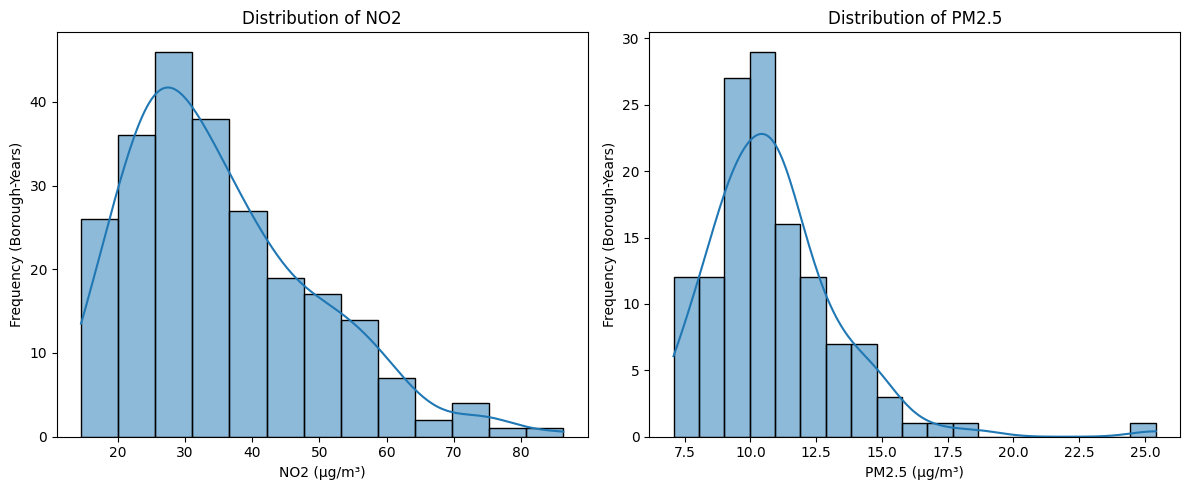

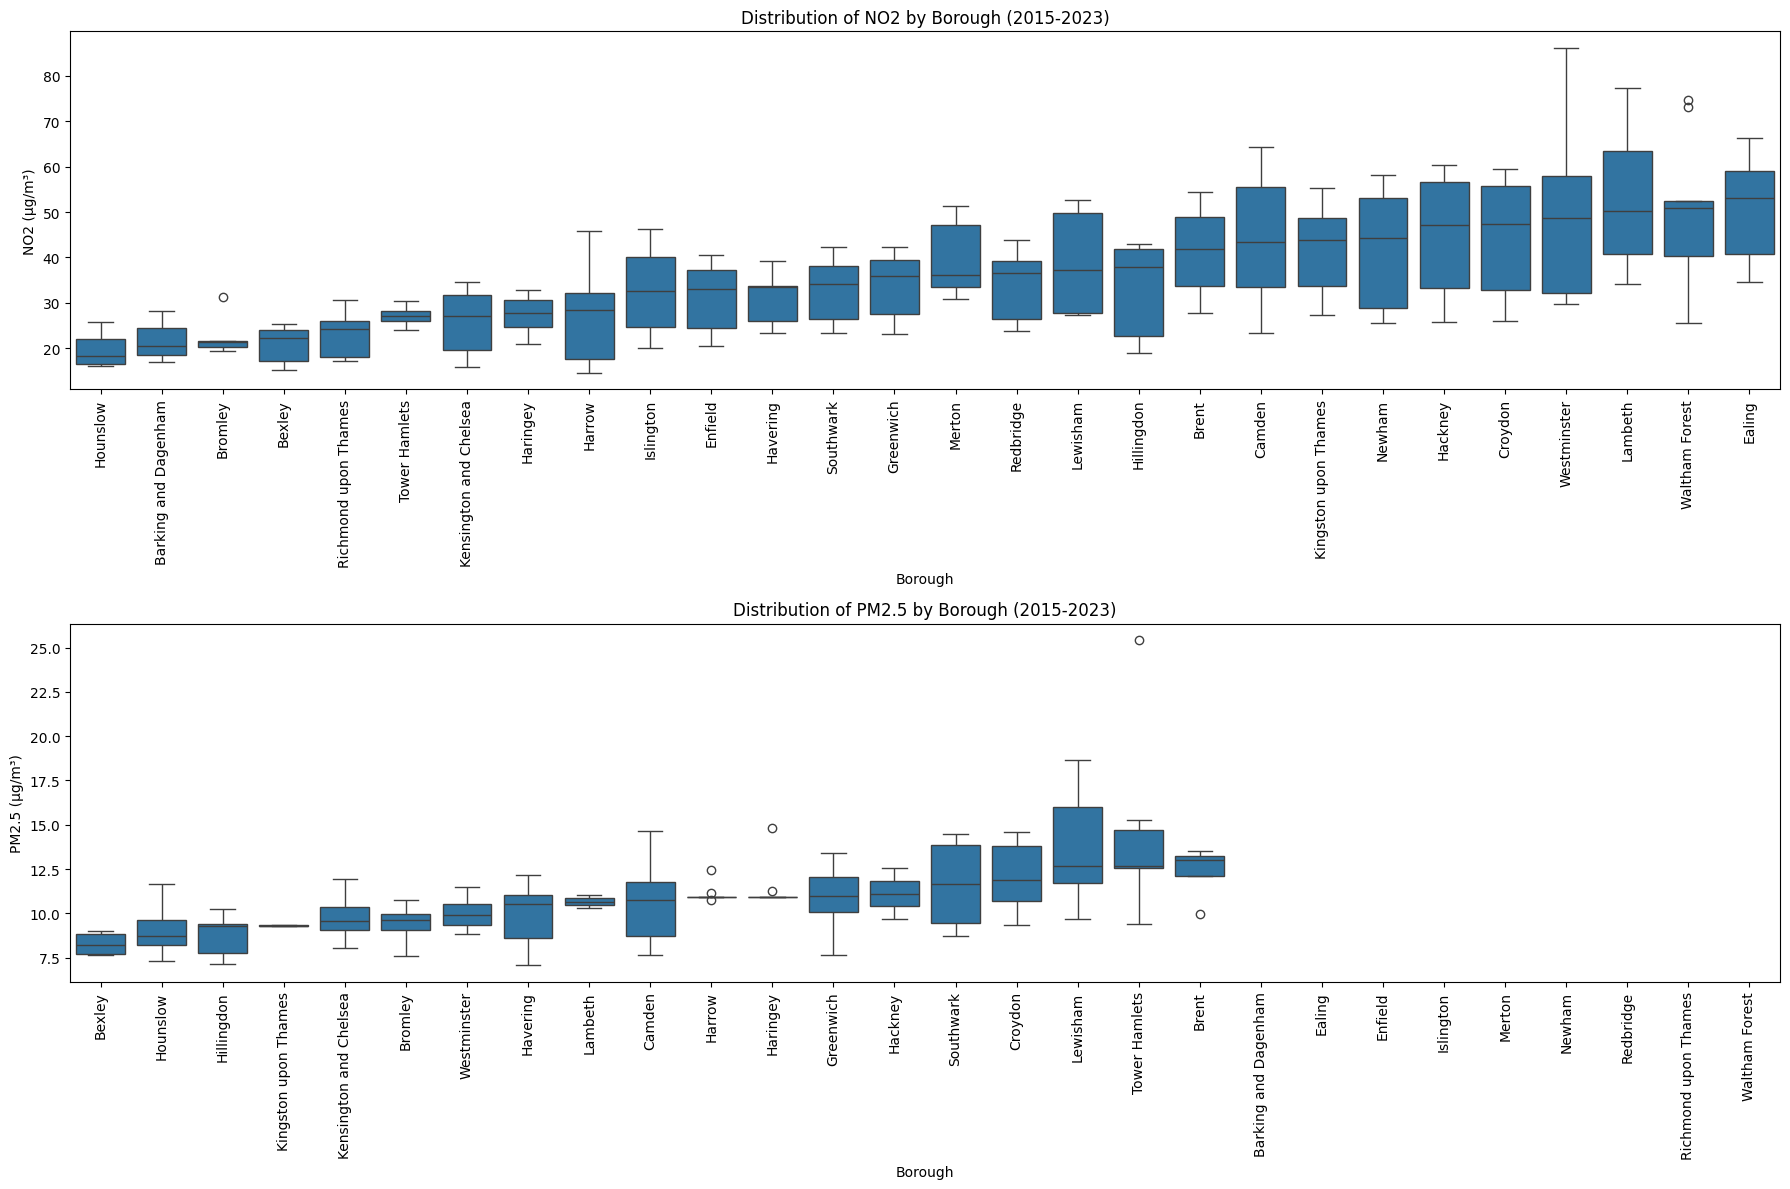

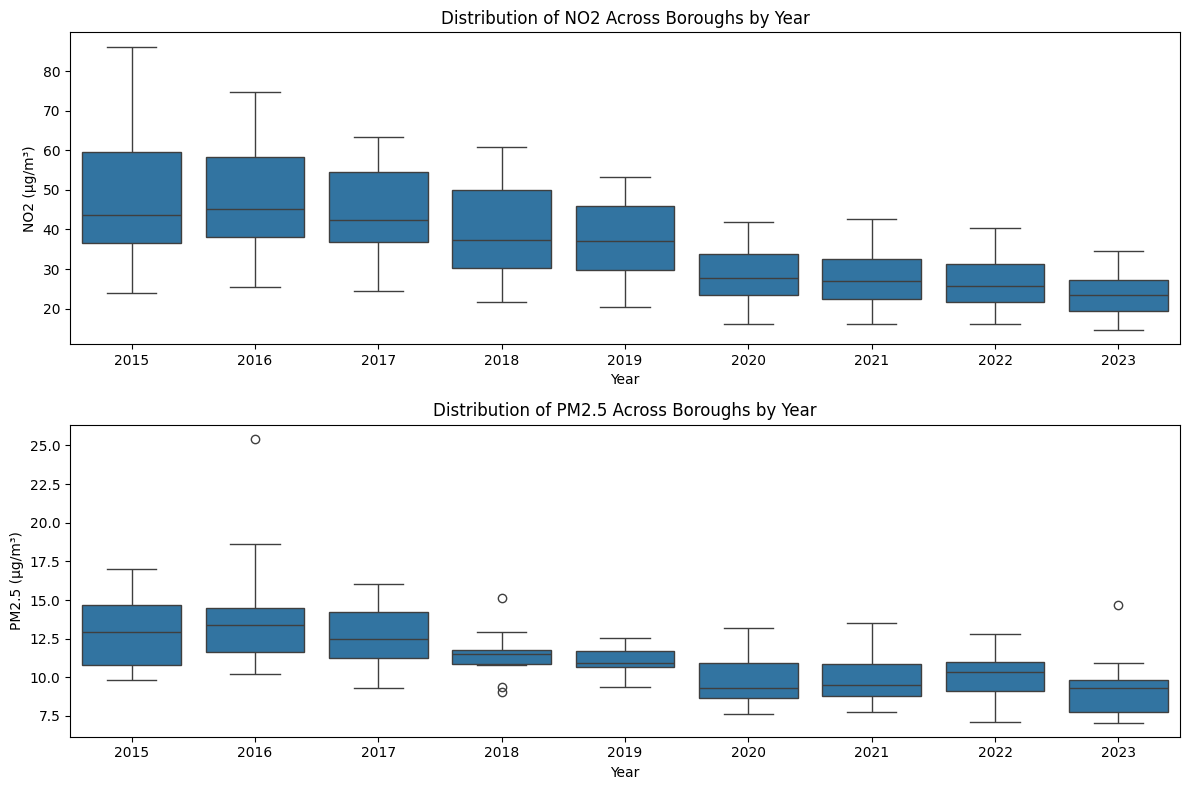

In [7]:
# =============================================
# --- Section 4.1: Distribution Analysis ---
# =============================================
pollutant_cols_dist = ['NO2', 'PM2.5']

# Histograms
plt.figure(figsize=(12, 5))
for i, col in enumerate(pollutant_cols_dist):
    plt.subplot(1, len(pollutant_cols_dist), i + 1)
    sns.histplot(merged_data[col].dropna(), kde=True) # dropna here just in case
    plt.title(f'Distribution of {col}')
    plt.xlabel(f'{col} (µg/m³)')
    plt.ylabel('Frequency (Borough-Years)')
plt.tight_layout()
# plt.savefig('distribution_histograms.png')
plt.show()

# Box plot by Borough
plt.figure(figsize=(18, 12))
for i, col in enumerate(pollutant_cols_dist):
    plt.subplot(len(pollutant_cols_dist), 1, i + 1)
    sorted_boroughs = merged_data.groupby('Borough')[col].median().sort_values().index
    sns.boxplot(data=merged_data, x='Borough', y=col, order=sorted_boroughs)
    plt.title(f'Distribution of {col} by Borough (2015-2023)')
    plt.xlabel('Borough')
    plt.ylabel(f'{col} (µg/m³)')
    plt.xticks(rotation=90)
plt.tight_layout()
# plt.savefig('boxplot_pollutants_by_borough.png')
plt.show()

# Box plot by Year
plt.figure(figsize=(12, 8))
for i, col in enumerate(pollutant_cols_dist):
    plt.subplot(len(pollutant_cols_dist), 1, i + 1)
    sns.boxplot(data=merged_data, x='Year', y=col)
    plt.title(f'Distribution of {col} Across Boroughs by Year')
    plt.xlabel('Year')
    plt.ylabel(f'{col} (µg/m³)')
plt.tight_layout()
# plt.savefig('boxplot_pollutants_by_year.png')
plt.show()

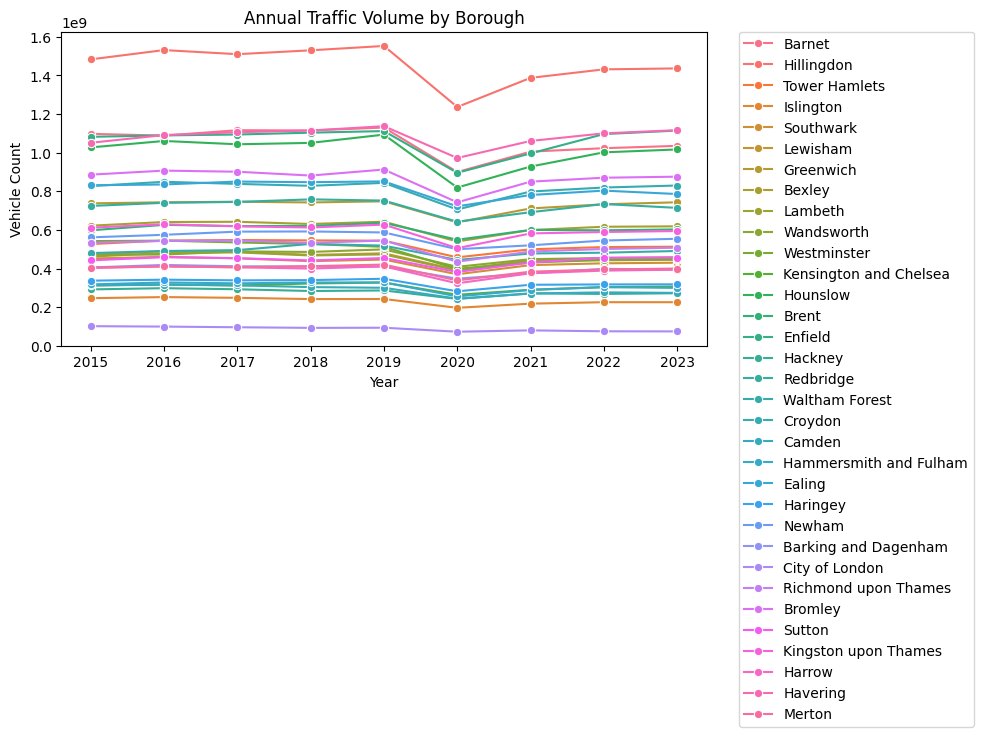

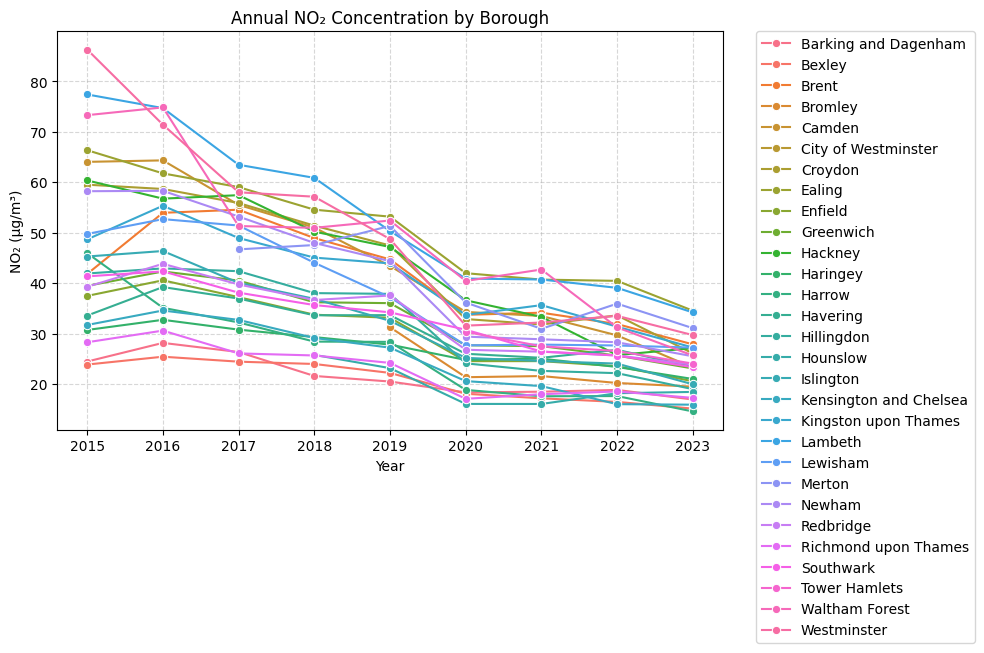

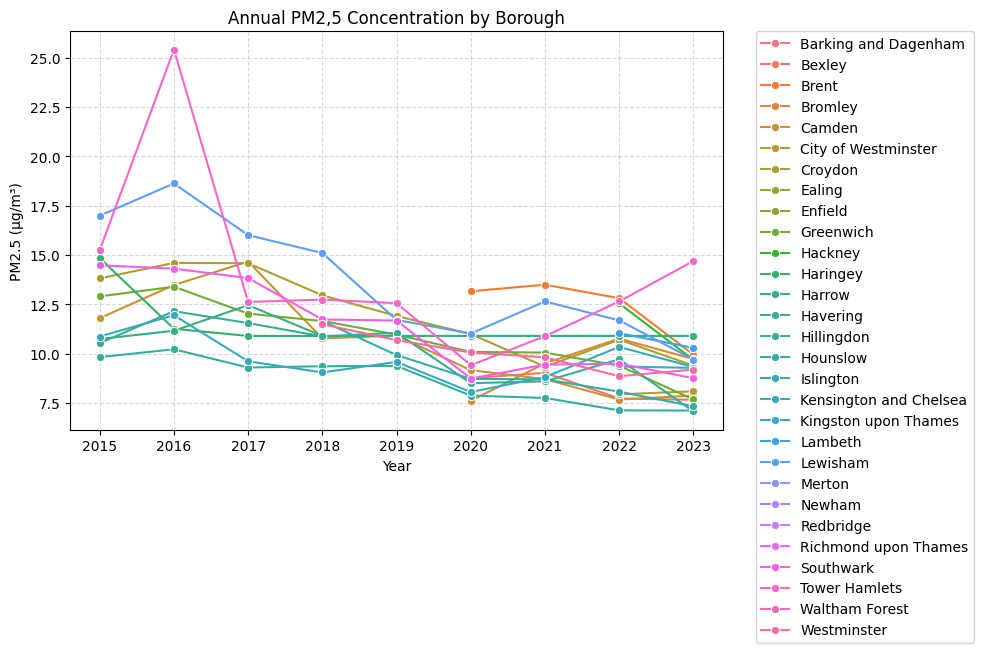

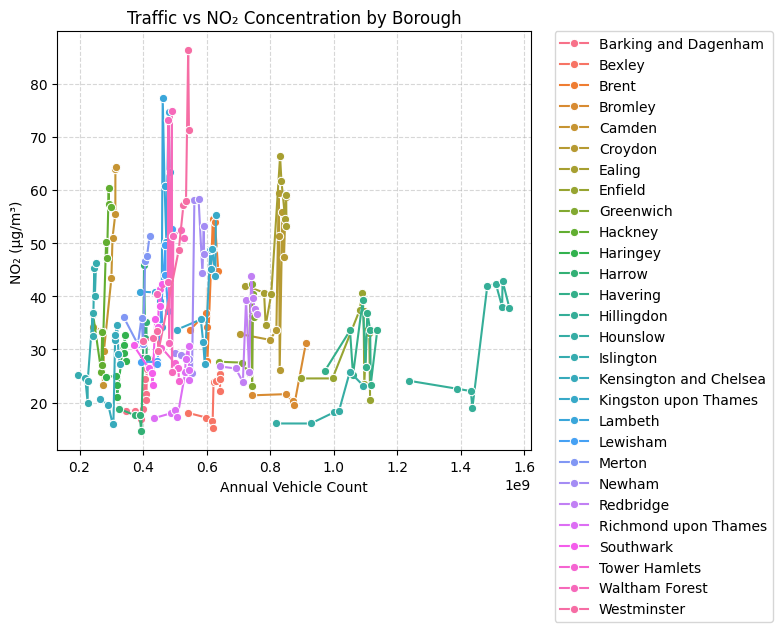

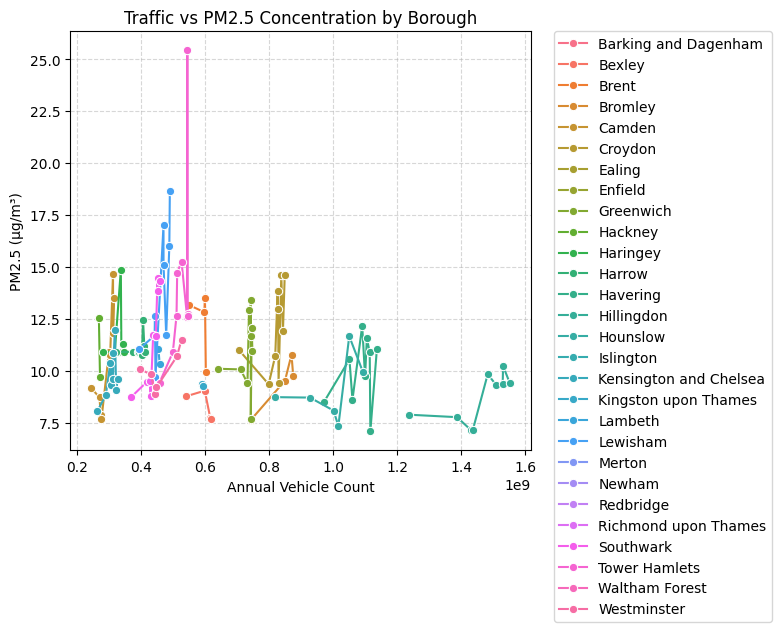

In [8]:
# ====================================
# --- Section 4.2: Temporal Trends ---
# ====================================

# Annual Traffic Volume by Borough
plt.figure(figsize=(10, 6))
sns.lineplot(data=traffic_data, x='Year', y='Vehicle Count', hue='Borough', marker='o')
plt.title('Annual Traffic Volume by Borough')
plt.ylabel('Vehicle Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout() 
plt.show()

# Annual NO2 Concentration by Borough
plt.figure(figsize=(10, 6))
sns.lineplot(data=air_quality_data, 
             x='Year', y='NO2', hue='Borough', marker='o')
plt.title('Annual NO₂ Concentration by Borough')
plt.ylabel('NO₂ (µg/m³)')
plt.xlabel('Year')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

# Annual PM2.5 Concentration by Borough
plt.figure(figsize=(10, 6))
sns.lineplot(data=air_quality_data, 
             x='Year', y='PM2.5', hue='Borough', marker='o')
plt.title('Annual PM2,5 Concentration by Borough')
plt.ylabel('PM2.5 (µg/m³)')
plt.xlabel('Year')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

# Traffic vs NO2 Concentration by Borough
plt.figure(figsize=(8, 6))
sns.lineplot(data=merged_data, 
                x='Vehicle Count', y='NO2', hue='Borough', marker='o')
plt.title('Traffic vs NO₂ Concentration by Borough')
plt.xlabel('Annual Vehicle Count')
plt.ylabel('NO₂ (µg/m³)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

# Traffic vs PM2.5 Concentration by Borough
plt.figure(figsize=(8, 6))
sns.lineplot(data=merged_data, 
                x='Vehicle Count', y='PM2.5', hue='Borough', marker='o')
plt.title('Traffic vs PM2.5 Concentration by Borough')
plt.xlabel('Annual Vehicle Count')
plt.ylabel('PM2.5 (µg/m³)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()


--- Running Correlation Analysis ---

Correlation Coefficients (r) and p-values for unique pairs:
Correlation between Vehicle Count and NO2: r=-0.001, p=0.993
Correlation between Vehicle Count and PM2.5: r=-0.247, p=0.0057
Correlation between NO2 and PM2.5: r=0.630, p=4.4e-15


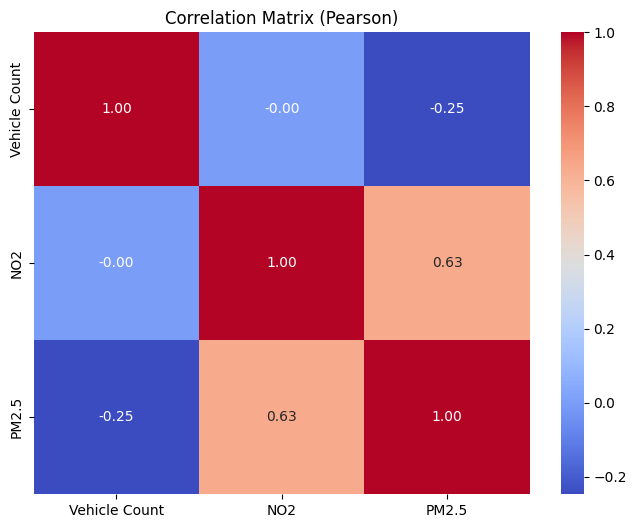

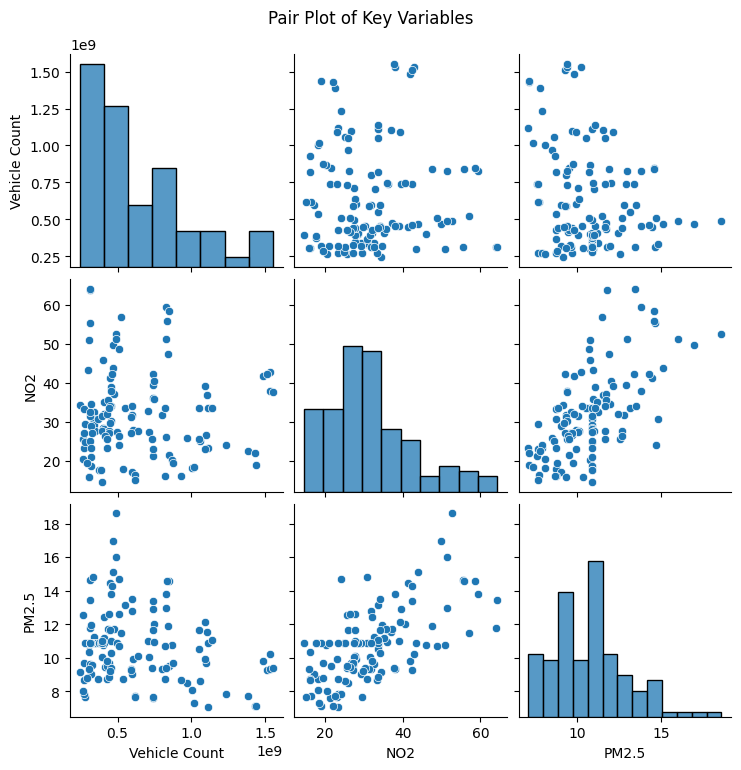

In [9]:
# =========================================
# --- Section 4.3: Correlation Analysis ---
# =========================================
print("\n--- Running Correlation Analysis ---")

corr_cols = ['Vehicle Count', 'NO2', 'PM2.5'] # Adjust names if needed

# Select only numeric columns and drop rows with any NaNs in these columns
# This ensures pearsonr gets clean data for each pair derived from the same base rows
correlation_data = merged_data[corr_cols].dropna()

# Calculate Pearson correlation matrix (for heatmap)
corr_matrix = correlation_data.corr(method='pearson')

print("\nCorrelation Coefficients (r) and p-values for unique pairs:")
# Use indexed loops to avoid duplicates and self-correlation
for i in range(len(corr_cols)):
    for j in range(i + 1, len(corr_cols)): # Start j from i+1
        col1 = corr_cols[i]
        col2 = corr_cols[j]

        # Calculate correlation and p-value for the pair using the pre-cleaned data
        corr, p_value = pearsonr(correlation_data[col1], correlation_data[col2])

        print(f"Correlation between {col1} and {col2}: r={corr:.3f}, p={p_value:.3g}")


# Visualize the correlation matrix (Heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix.astype(float), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Pearson)')
# plt.savefig('correlation_heatmap.png')
plt.show()

# Pair Plot for visual inspection
sns.pairplot(correlation_data)
plt.suptitle('Pair Plot of Key Variables', y=1.02)
# plt.savefig('pair_plot.png')
plt.show()

In [10]:
# ============================================================
# --- Section 4.4: Regression Analysis (Linear Regression) ---
# ============================================================
print("\n--- Running Regression Analysis ---")

# Predicting NO2
target_no2 = 'NO2'
# Consider features. Start simple, potentially add Borough later using dummies.
features_reg = ['Vehicle Count', 'Year']

# Prepare data - ensure no NaNs in relevant columns
regression_df_no2 = merged_data[features_reg + [target_no2]].dropna()

if not regression_df_no2.empty:
    X_no2 = regression_df_no2[features_reg]
    y_no2 = regression_df_no2[target_no2]

    # Split data into training and testing sets
    X_train_no2, X_test_no2, y_train_no2, y_test_no2 = train_test_split(
        X_no2, y_no2, test_size=0.2, random_state=42
    )

    # Initialize and fit the model
    model_no2 = LinearRegression()
    model_no2.fit(X_train_no2, y_train_no2)

    # Make predictions and evaluate
    y_pred_no2 = model_no2.predict(X_test_no2)
    r2_no2 = r2_score(y_test_no2, y_pred_no2)
    rmse_no2 = np.sqrt(mean_squared_error(y_test_no2, y_pred_no2))

    # Print results
    print(f"\n--- NO2 Regression Results ({target_no2} ~ {features_reg}) ---")
    print(f"Intercept: {model_no2.intercept_:.3f}")
    for feature, coef in zip(features_reg, model_no2.coef_):
        print(f"Coefficient for {feature}: {coef:.3f}")
    print(f"\nR-squared on test set: {r2_no2:.3f}")
    print(f"RMSE on test set: {rmse_no2:.3f}")
else:
    print("Insufficient data for NO2 regression after dropping NaNs.")

# Predicting PM2.5
target_pm25 = 'PM2.5'
features_reg = ['Vehicle Count', 'Year'] # Using same features for comparison

# Prepare data
regression_df_pm25 = merged_data[features_reg + [target_pm25]].dropna()

if not regression_df_pm25.empty:
    X_pm25 = regression_df_pm25[features_reg]
    y_pm25 = regression_df_pm25[target_pm25]

    # Split
    X_train_pm25, X_test_pm25, y_train_pm25, y_test_pm25 = train_test_split(
        X_pm25, y_pm25, test_size=0.2, random_state=42
    )

    # Fit
    model_pm25 = LinearRegression()
    model_pm25.fit(X_train_pm25, y_train_pm25)

    # Predict and Evaluate
    y_pred_pm25 = model_pm25.predict(X_test_pm25)
    r2_pm25 = r2_score(y_test_pm25, y_pred_pm25)
    rmse_pm25 = np.sqrt(mean_squared_error(y_test_pm25, y_pred_pm25))

    # Print results
    print(f"\n--- PM2.5 Regression Results ({target_pm25} ~ {features_reg}) ---")
    print(f"Intercept: {model_pm25.intercept_:.3f}")
    for feature, coef in zip(features_reg, model_pm25.coef_):
        print(f"Coefficient for {feature}: {coef:.3f}")
    print(f"\nR-squared on test set: {r2_pm25:.3f}")
    print(f"RMSE on test set: {rmse_pm25:.3f}")
    print(f"NO2 N value: {regression_df_no2.shape[0]}")
    print(f"PM2.5 N value: {regression_df_pm25.shape[0]}")
else:
    print("Insufficient data for PM2.5 regression after dropping NaNs.")


--- Running Regression Analysis ---

--- NO2 Regression Results (NO2 ~ ['Vehicle Count', 'Year']) ---
Intercept: 7509.577
Coefficient for Vehicle Count: -0.000
Coefficient for Year: -3.701

R-squared on test set: 0.320
RMSE on test set: 10.422

--- PM2.5 Regression Results (PM2.5 ~ ['Vehicle Count', 'Year']) ---
Intercept: 1062.528
Coefficient for Vehicle Count: -0.000
Coefficient for Year: -0.520

R-squared on test set: 0.544
RMSE on test set: 1.622
NO2 N value: 238
PM2.5 N value: 129



--- ITSA Model Summary for NO2 in Camden ---
                            OLS Regression Results                            
Dep. Variable:       Daily_Mean_Value   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     225.8
Date:                Tue, 06 May 2025   Prob (F-statistic):               0.00
Time:                        00:47:54   Log-Likelihood:                -13409.
No. Observations:                3287   AIC:                         2.685e+04
Df Residuals:                    3270   BIC:                         2.696e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

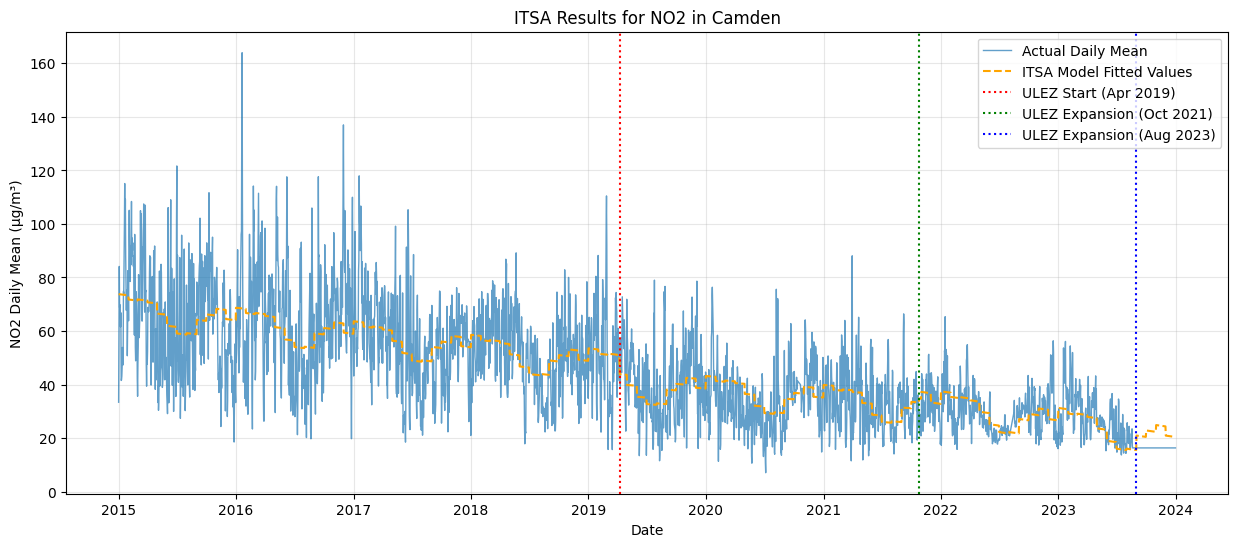


--- ITSA Model Summary for PM2.5 in Camden ---
                            OLS Regression Results                            
Dep. Variable:       Daily_Mean_Value   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     30.54
Date:                Tue, 06 May 2025   Prob (F-statistic):           5.21e-87
Time:                        00:47:54   Log-Likelihood:                -11028.
No. Observations:                3287   AIC:                         2.209e+04
Df Residuals:                    3270   BIC:                         2.219e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

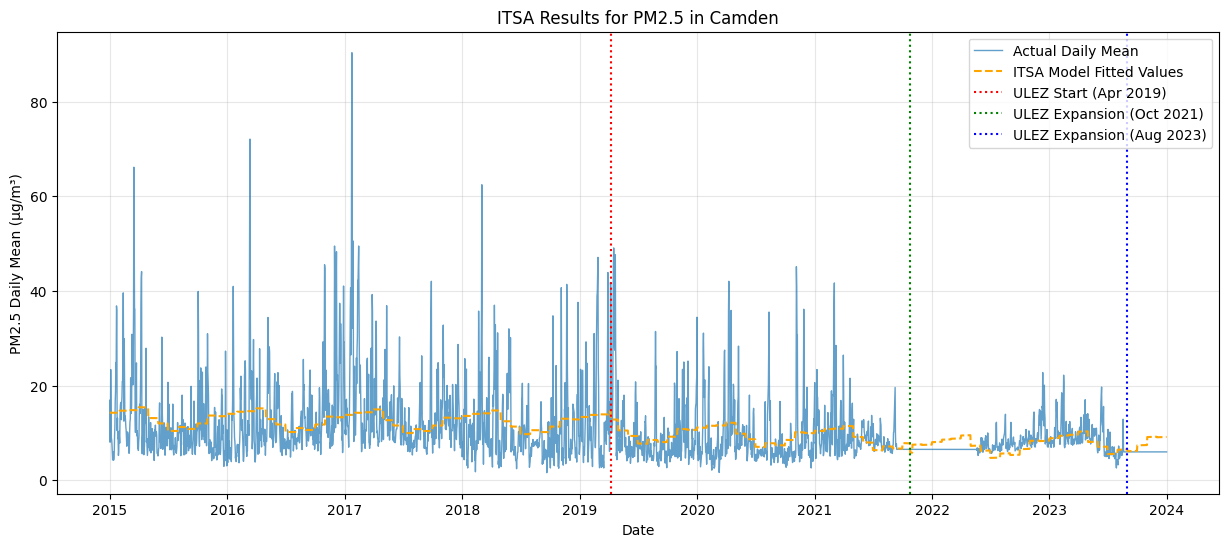


--- ITSA Model Summary for NO2 in Croydon ---
                            OLS Regression Results                            
Dep. Variable:       Daily_Mean_Value   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     229.2
Date:                Tue, 06 May 2025   Prob (F-statistic):               0.00
Time:                        00:47:54   Log-Likelihood:                -12998.
No. Observations:                3287   AIC:                         2.603e+04
Df Residuals:                    3270   BIC:                         2.613e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

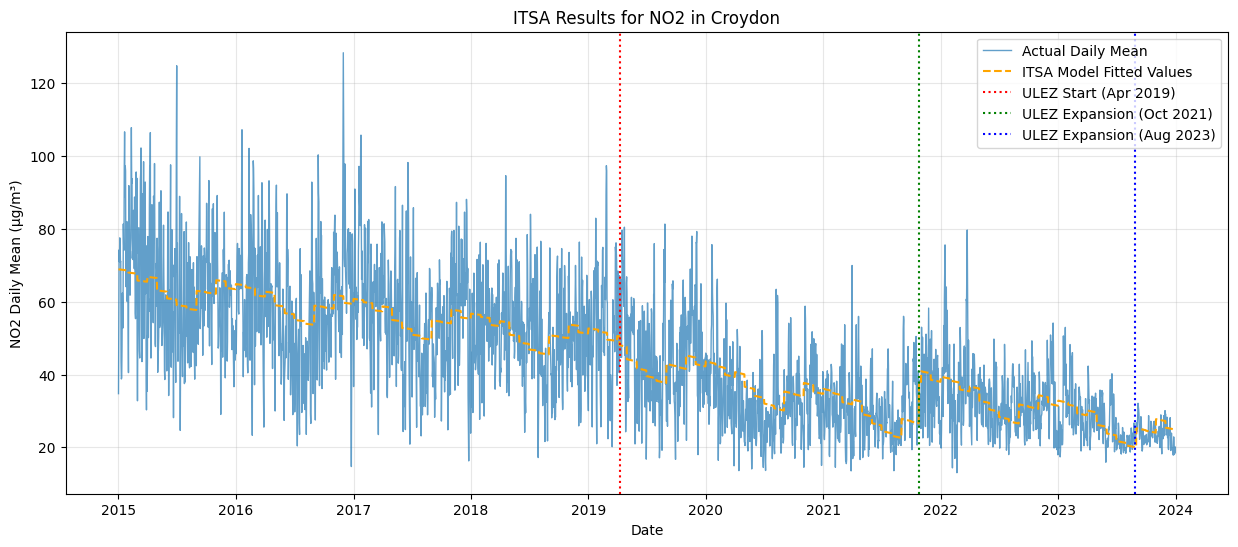


--- ITSA Model Summary for PM2.5 in Croydon ---
                            OLS Regression Results                            
Dep. Variable:       Daily_Mean_Value   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     41.27
Date:                Tue, 06 May 2025   Prob (F-statistic):          6.76e-118
Time:                        00:47:55   Log-Likelihood:                -10523.
No. Observations:                3276   AIC:                         2.108e+04
Df Residuals:                    3259   BIC:                         2.118e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

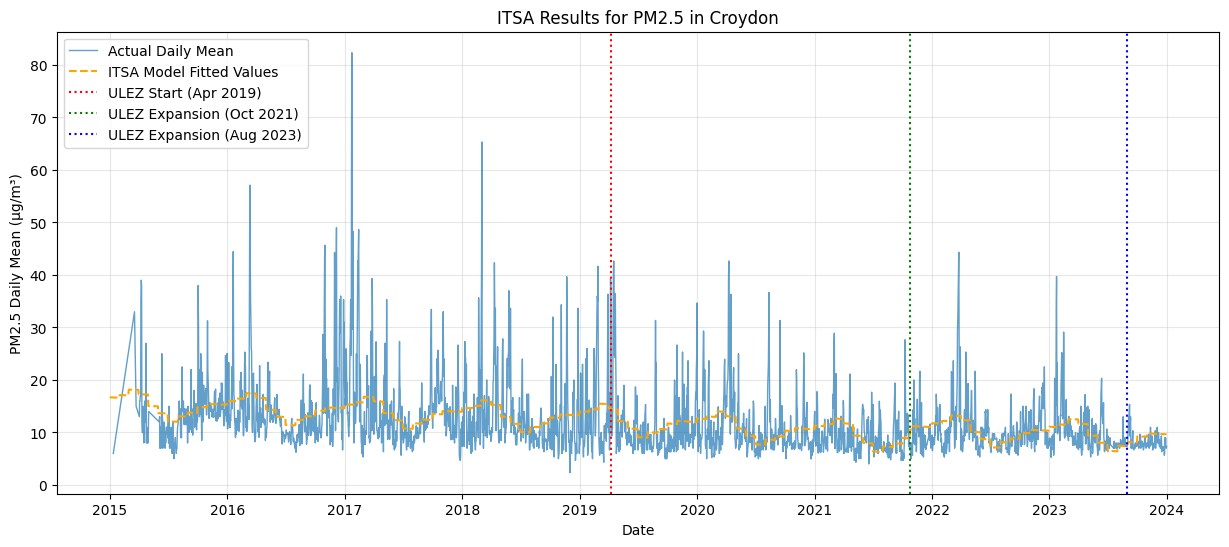


--- ITSA Model Summary for NO2 in Lambeth ---
                            OLS Regression Results                            
Dep. Variable:       Daily_Mean_Value   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     270.6
Date:                Tue, 06 May 2025   Prob (F-statistic):               0.00
Time:                        00:47:55   Log-Likelihood:                -13503.
No. Observations:                3287   AIC:                         2.704e+04
Df Residuals:                    3270   BIC:                         2.714e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

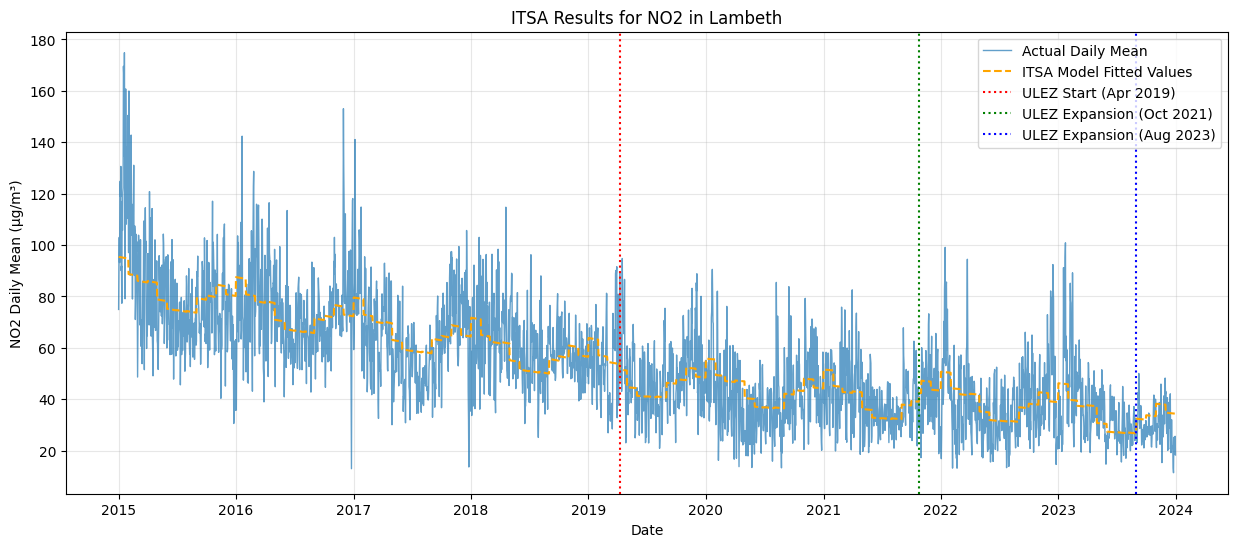


--- ITSA Model Summary for PM2.5 in Lambeth ---
                            OLS Regression Results                            
Dep. Variable:       Daily_Mean_Value   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     5.754
Date:                Tue, 06 May 2025   Prob (F-statistic):           1.58e-09
Time:                        00:47:55   Log-Likelihood:                -2307.3
No. Observations:                 701   AIC:                             4641.
Df Residuals:                     688   BIC:                             4700.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

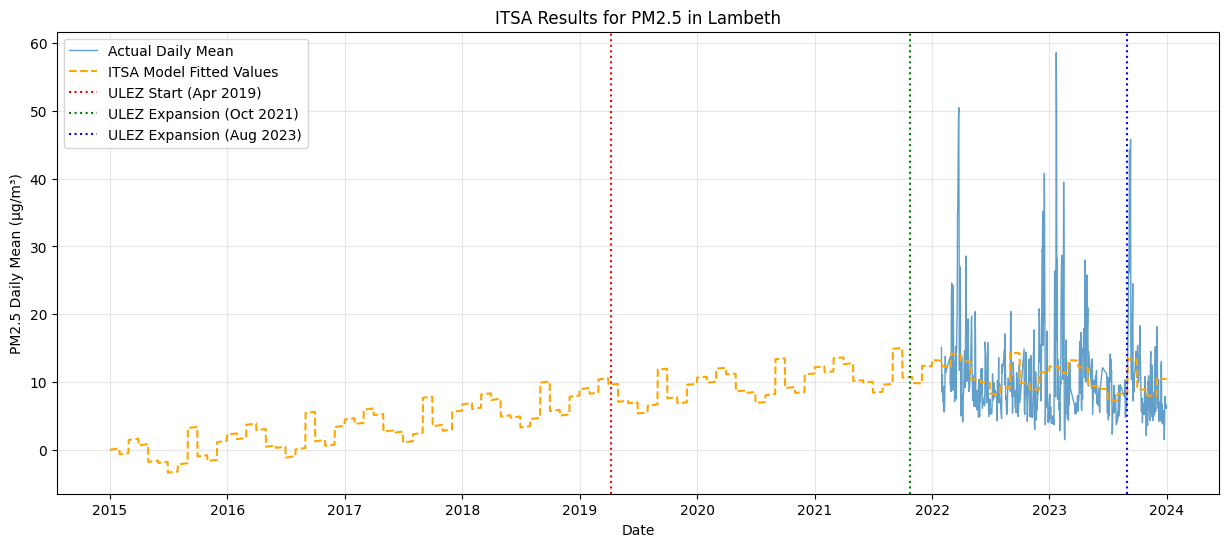


--- ITSA Model Summary for NO2 in Westminster ---
                            OLS Regression Results                            
Dep. Variable:       Daily_Mean_Value   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     448.6
Date:                Tue, 06 May 2025   Prob (F-statistic):               0.00
Time:                        00:47:55   Log-Likelihood:                -13176.
No. Observations:                3287   AIC:                         2.639e+04
Df Residuals:                    3270   BIC:                         2.649e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

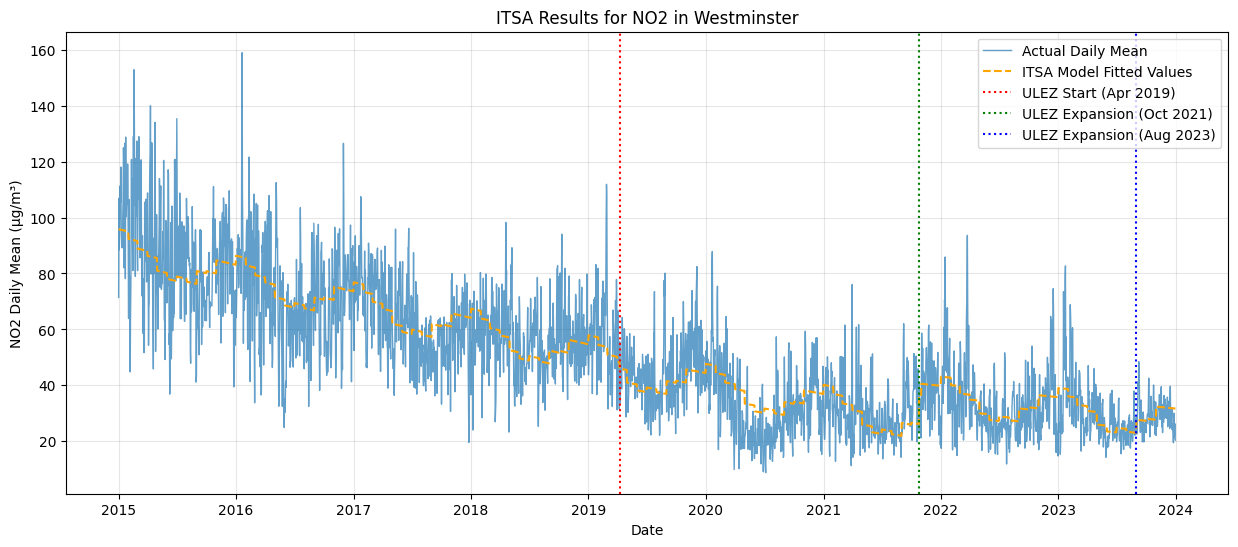


--- ITSA Model Summary for PM2.5 in Westminster ---
                            OLS Regression Results                            
Dep. Variable:       Daily_Mean_Value   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     21.08
Date:                Tue, 06 May 2025   Prob (F-statistic):           3.79e-57
Time:                        00:47:55   Log-Likelihood:                -6651.1
No. Observations:                2103   AIC:                         1.334e+04
Df Residuals:                    2086   BIC:                         1.343e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

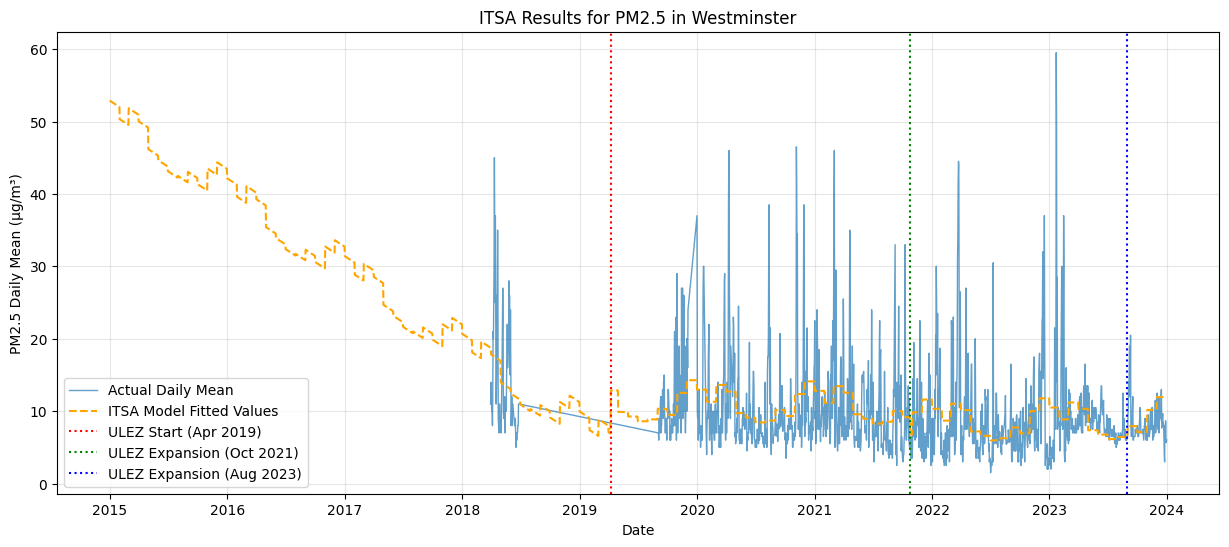

In [11]:
# ===========================================
# --- Section 4.5: ULEZ Impact Assessment ---
# ===========================================
def itsa(input_df, borough_name):
    # Determine pollutant and filter initial data
    if 'NO2' in input_df.columns:
        outcome_var = 'NO2'
        filtered_df = input_df[['ReadingDateTime', outcome_var]].copy()
    elif 'PM2.5' in input_df.columns:
        outcome_var = 'PM2.5'
        filtered_df = input_df[['ReadingDateTime', outcome_var]].copy()
    else:
        print(f"Error: Input DataFrame for {borough_name} lacks 'NO2' or 'PM2.5' column.")
        return None

    # Aggregate across sites by taking the daily mean
    daily_agg_df = filtered_df.groupby(pd.Grouper(key='ReadingDateTime', freq='D'))[outcome_var].mean().reset_index()
    daily_agg_df.rename(columns={'ReadingDateTime': 'Date', outcome_var: 'Daily_Mean_Value'}, inplace=True) # Standardize column names

    # Prepare the DataFrame for ITSA
    itsa_df = daily_agg_df.copy()
    itsa_df.set_index('Date', inplace=True) # Now set the unique Date as index
    itsa_df.sort_index(inplace=True)

    # Create Time Variables
    itsa_df['time'] = np.arange(len(itsa_df)) + 1

    # Define Intervention Dates
    ulez_start_date = pd.to_datetime('2019-04-08')
    ulez_expansion_date = pd.to_datetime('2021-10-25')
    ulez_expansion_date2 = pd.to_datetime('2023-08-29') 

    # Create Intervention Variables
    # Initial ULEZ
    if ulez_start_date in itsa_df.index:
      itsa_df['intervention1_dummy'] = (itsa_df.index >= ulez_start_date).astype(int)
      # Use .loc for safer index lookup
      time_since_start_idx1 = itsa_df.loc[ulez_start_date, 'time']
      # Handle potential multiple values if date somehow duplicated after aggregation (shouldn't happen now)
      if isinstance(time_since_start_idx1, pd.Series): time_since_start_idx1 = time_since_start_idx1.iloc[0]

      itsa_df['time_since_intervention1'] = (itsa_df['time'] - time_since_start_idx1 + 1) * itsa_df['intervention1_dummy']
      itsa_df.loc[itsa_df['time_since_intervention1'] < 0, 'time_since_intervention1'] = 0
    else:
      print(f"Warning: ULEZ start date {ulez_start_date.date()} not found in index for {borough_name}. Setting Intervention 1 vars to 0.")
      itsa_df['intervention1_dummy'] = 0
      itsa_df['time_since_intervention1'] = 0

    # Expansion ULEZ
    if ulez_expansion_date in itsa_df.index:
      itsa_df['intervention2_dummy'] = (itsa_df.index >= ulez_expansion_date).astype(int)
      # Use .loc for safer index lookup
      time_since_start_idx2 = itsa_df.loc[ulez_expansion_date, 'time']
      # Handle potential multiple values
      if isinstance(time_since_start_idx2, pd.Series): time_since_start_idx2 = time_since_start_idx2.iloc[0]

      itsa_df['time_since_intervention2'] = (itsa_df['time'] - time_since_start_idx2 + 1) * itsa_df['intervention2_dummy']
      itsa_df.loc[itsa_df['time_since_intervention2'] < 0, 'time_since_intervention2'] = 0
    else:
      print(f"Warning: ULEZ expansion date {ulez_expansion_date.date()} not found in index for {borough_name}. Setting Intervention 2 vars to 0.")
      itsa_df['intervention2_dummy'] = 0
      itsa_df['time_since_intervention2'] = 0

    # Add Seasonality Controls (Month Dummies)
    itsa_df['Month'] = itsa_df.index.month

    # Define the outcome variable (standardized name)
    outcome_var_standard = 'Daily_Mean_Value'

    # Define the model formula
    formula = f"{outcome_var_standard} ~ time + intervention1_dummy + time_since_intervention1 + intervention2_dummy + time_since_intervention2 + C(Month)"

    # Fit the OLS model
    model_fit = None
    try:
        # Ensure data exists after dropping potential NaNs from outcome or created variables
        data_to_fit = itsa_df.dropna(subset=[outcome_var_standard, 'time', 'intervention1_dummy', 'time_since_intervention1', 'intervention2_dummy', 'time_since_intervention2', 'Month'])
        if not data_to_fit.empty and len(data_to_fit) > 10: # Add check for minimum data points
             model_fit = smf.ols(formula, data=data_to_fit).fit()
             print(f"\n--- ITSA Model Summary for {outcome_var} in {borough_name} ---")
             print(model_fit.summary())
        elif data_to_fit.empty:
             print(f"No data available to fit model for {outcome_var} in {borough_name} after dropping NaNs.")
        else:
             print(f"Insufficient data points ({len(data_to_fit)}) to fit model for {outcome_var} in {borough_name}.")


    except Exception as e:
        print(f"Error fitting model for {outcome_var} in {borough_name}: {e}")

    # Plot the graph of actual vs fitted values
    if model_fit:
        itsa_df['fitted'] = model_fit.predict(itsa_df) # Predict on original itsa_df

        plt.figure(figsize=(15, 6))
        plt.plot(itsa_df.index, itsa_df[outcome_var_standard], label='Actual Daily Mean', alpha=0.7, linewidth=1)
        plt.plot(itsa_df.index, itsa_df['fitted'], label='ITSA Model Fitted Values', linestyle='--', color='orange')
        plt.axvline(ulez_start_date, color='r', linestyle=':', label='ULEZ Start (Apr 2019)')
        plt.axvline(ulez_expansion_date, color='g', linestyle=':', label='ULEZ Expansion (Oct 2021)')
        plt.axvline(ulez_expansion_date2, color='b', linestyle=':', label='ULEZ Expansion (Aug 2023)')
        plt.title(f'ITSA Results for {outcome_var} in {borough_name}')
        plt.xlabel('Date')
        plt.ylabel(f'{outcome_var} Daily Mean (µg/m³)')
        plt.legend()
        plt.grid(True, alpha=0.3)
        # plt.savefig(f'itsa_plot_{borough_name}_{outcome_var}.png')
        plt.show()

    return model_fit

# --------------------------------------------------------------------------------------------------------------------------------


# Camden NO2:
camden_no2_input_df = air_quality_daily[air_quality_daily['Borough'] == 'Camden'][['ReadingDateTime', 'NO2']].copy()
camden_no2_model = itsa(camden_no2_input_df, 'Camden')

# Camden PM2.5:
camden_pm25_input_df = air_quality_daily[air_quality_daily['Borough'] == 'Camden'][['ReadingDateTime', 'PM2.5']].copy()
camden_pm25_model = itsa(camden_pm25_input_df, 'Camden')


# --------------------------------------------------------------------------------------------------------------------------------


# Croydon NO2:
croydon_no2_input_df = air_quality_daily[air_quality_daily['Borough'] == 'Croydon'][['ReadingDateTime', 'NO2']].copy()
croydon_no2_model = itsa(croydon_no2_input_df, 'Croydon')

# Croydon PM2.5:
croydon_pm25_input_df = air_quality_daily[air_quality_daily['Borough'] == 'Croydon'][['ReadingDateTime', 'PM2.5']].copy()
croydon_pm25_model = itsa(croydon_pm25_input_df, 'Croydon')


# --------------------------------------------------------------------------------------------------------------------------------


# Lambeth NO2:
lambeth_no2_input_df = air_quality_daily[air_quality_daily['Borough'] == 'Lambeth'][['ReadingDateTime', 'NO2']].copy()
lambeth_no2_model = itsa(lambeth_no2_input_df, 'Lambeth')

# Lambeth PM2.5:
lambeth_pm25_input_df = air_quality_daily[air_quality_daily['Borough'] == 'Lambeth'][['ReadingDateTime', 'PM2.5']].copy()
lambeth_pm25_model = itsa(lambeth_pm25_input_df, 'Lambeth')


# --------------------------------------------------------------------------------------------------------------------------------


# Westminster NO2:
westminster_no2_input_df = air_quality_daily[air_quality_daily['Borough'] == 'Westminster'][['ReadingDateTime', 'NO2']].copy()
westminster_no2_model = itsa(westminster_no2_input_df, 'Westminster')

# Westminster PM2.5:
westminster_pm25_input_df = air_quality_daily[air_quality_daily['Borough'] == 'Westminster'][['ReadingDateTime', 'PM2.5']].copy()
westminster_pm25_model = itsa(westminster_pm25_input_df, 'Westminster')


# --------------------------------------------------------------------------------------------------------------------------------


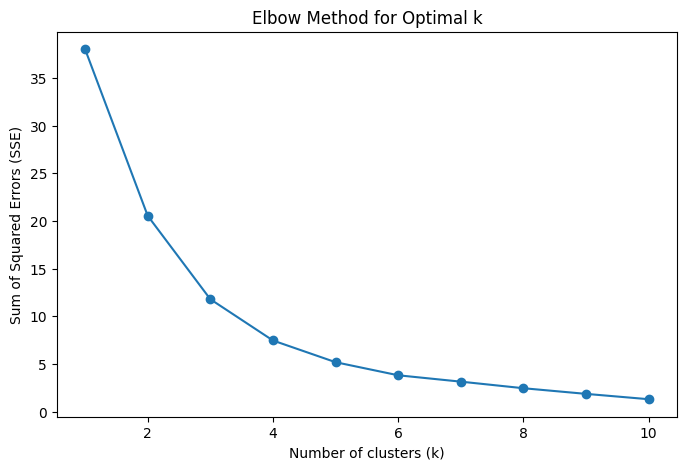


Running K-Means with k=3 clusters

Mean Pollution Levels per Cluster:
               NO2      PM2.5
Cluster                      
1        46.113284  10.620191
0        32.394376  12.124014
2        25.272231   9.196642

Identified Hotspot Cluster Label (Highest Mean NO2): 1

Boroughs in Hotspot Cluster 1:
['Camden', 'Croydon', 'Hackney', 'Kingston upon Thames', 'Lambeth', 'Westminster']


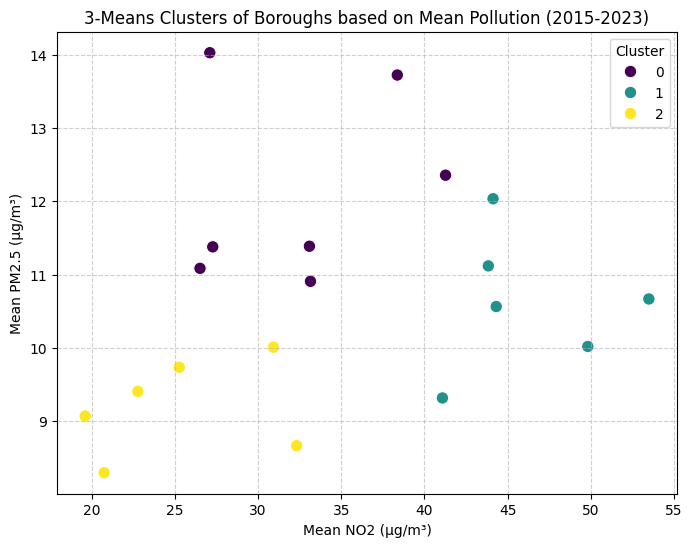

In [12]:
# =============================================
# --- Section 4.6: Hotspot Identification ---
# =============================================

# Calculate mean pollution per borough over the entire period
hotspot_cols = ['NO2', 'PM2.5'] # Adjust names
borough_means_hs = merged_data.groupby('Borough')[hotspot_cols].mean().dropna()

if not borough_means_hs.empty:
    # Scale data
    scaler_hs = StandardScaler()
    scaled_data_hs = scaler_hs.fit_transform(borough_means_hs)

    # Elbow Method to help choose K
    sse = []
    k_range = range(1, 11) # Check clusters from 1 to 10
    for k in k_range:
        kmeans_elbow = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans_elbow.fit(scaled_data_hs)
        sse.append(kmeans_elbow.inertia_)
    plt.figure(figsize=(8, 5))
    plt.plot(k_range, sse, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.title('Elbow Method for Optimal k')
    # plt.savefig('kmeans_elbow_plot.png')
    plt.show()

    # Choose k based on Elbow method or domain knowledge
    k_chosen = 3
    print(f"\nRunning K-Means with k={k_chosen} clusters")
    kmeans_hs = KMeans(n_clusters=k_chosen, random_state=42, n_init=10)
    kmeans_hs.fit(scaled_data_hs)

    # Add cluster labels back
    borough_means_hs['Cluster'] = kmeans_hs.labels_

    # Analyze cluster characteristics
    cluster_summary_hs = borough_means_hs.groupby('Cluster')[hotspot_cols].mean().sort_values(by='NO2', ascending=False) # Sort by NO2 mean
    print("\nMean Pollution Levels per Cluster:")
    print(cluster_summary_hs)

    # Identify hotspot cluster (assuming highest NO2 mean is the primary indicator)
    hotspot_cluster_label_hs = cluster_summary_hs.index[0]
    print(f"\nIdentified Hotspot Cluster Label (Highest Mean NO2): {hotspot_cluster_label_hs}")

    hotspot_boroughs = borough_means_hs[borough_means_hs['Cluster'] == hotspot_cluster_label_hs].index.tolist()
    print(f"\nBoroughs in Hotspot Cluster {hotspot_cluster_label_hs}:")
    print(hotspot_boroughs)

    # Visualize clusters
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=borough_means_hs, x='NO2', y='PM2.5', hue='Cluster', palette='viridis', s=80, legend='full')
    plt.title(f'{k_chosen}-Means Clusters of Boroughs based on Mean Pollution (2015-2023)')
    plt.xlabel('Mean NO2 (µg/m³)')
    plt.ylabel('Mean PM2.5 (µg/m³)')
    plt.legend(title='Cluster')
    plt.grid(True, linestyle='--', alpha=0.6)
    # plt.savefig('kmeans_clusters_plot.png')
    plt.show()

else:
    print("Insufficient data for K-Means clustering after grouping and dropping NaNs.")

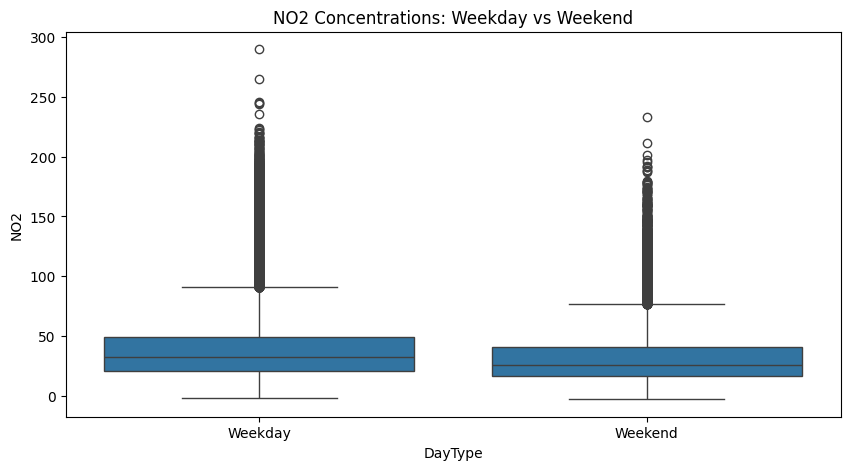

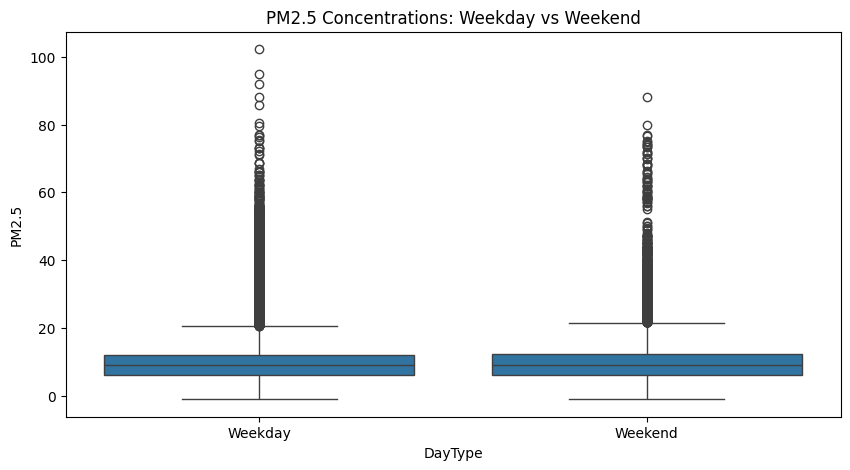

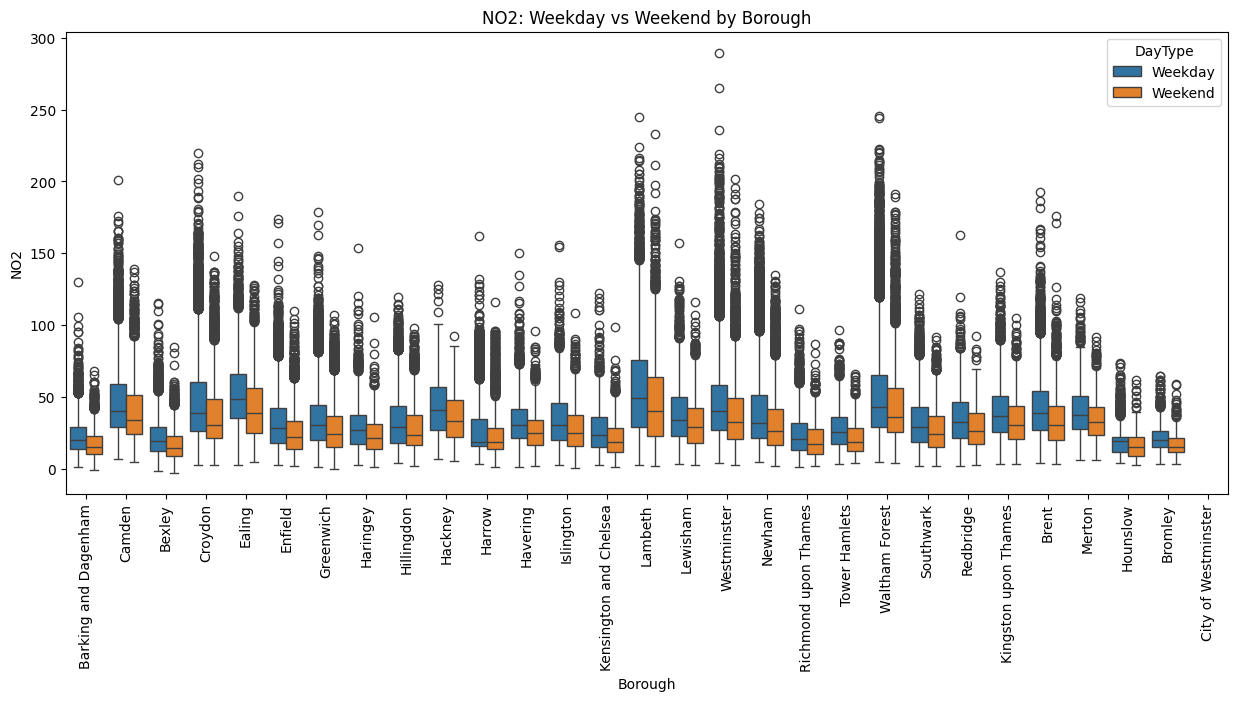

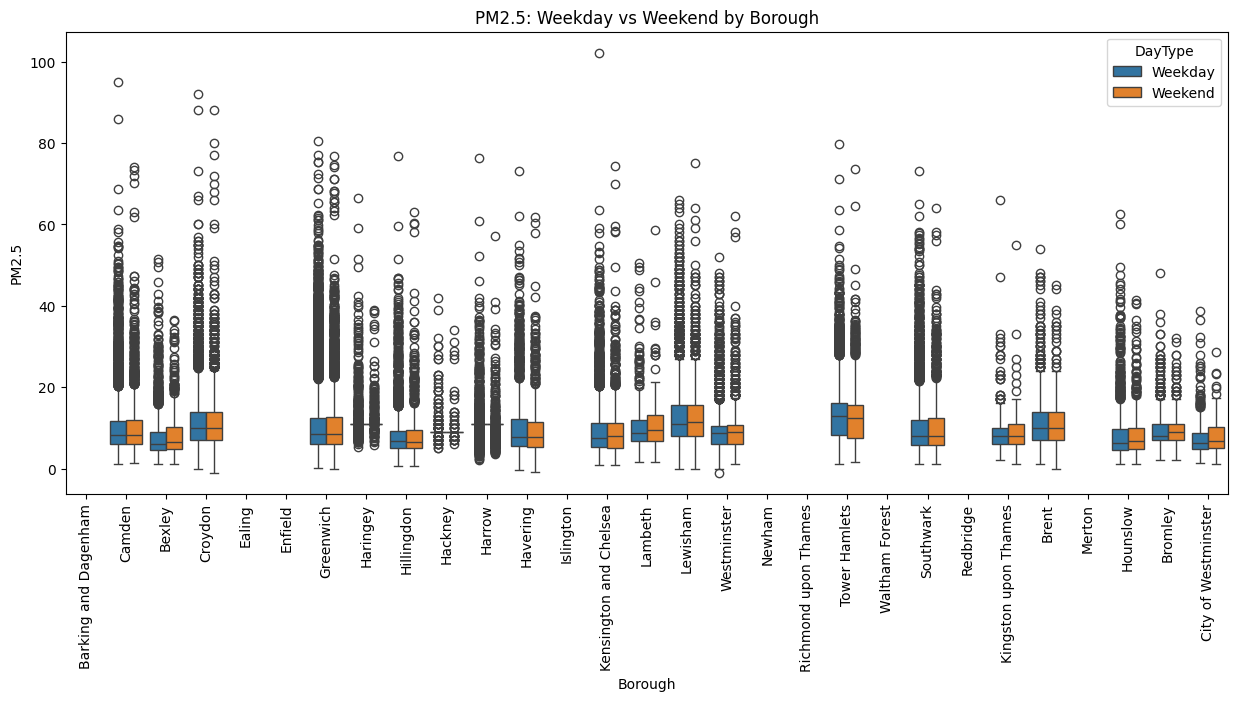

In [13]:
# ==================================================================
# --- Section 4.7: Comparing Weekday Concentrations with Weekend ---
# ==================================================================

plt.figure(figsize=(10, 5))
sns.boxplot(data=air_quality_daily, x='DayType', y='NO2')
plt.title('NO2 Concentrations: Weekday vs Weekend')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=air_quality_daily, x='DayType', y='PM2.5')
plt.title('PM2.5 Concentrations: Weekday vs Weekend')
plt.show()

plt.figure(figsize=(15, 6))
sns.boxplot(data=air_quality_daily, x='Borough', y='NO2', hue='DayType')
plt.xticks(rotation=90)
plt.title('NO2: Weekday vs Weekend by Borough')
plt.show()

plt.figure(figsize=(15, 6))
sns.boxplot(data=air_quality_daily, x='Borough', y='PM2.5', hue='DayType')
plt.xticks(rotation=90)
plt.title('PM2.5: Weekday vs Weekend by Borough')
plt.show()